In [20]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import math

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
dataset = pd.read_csv('student-mat.csv', sep=';')
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
pd.set_option('display.max_columns',50)

In [6]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [8]:
dataset.shape

(395, 33)

In [7]:
reqdata = dataset[['G1','G2','G3','studytime','failures','absences']]
reqdata.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [9]:
pred_label = 'G3'
x = np.array(reqdata.drop([pred_label], 1))
y = np.array(reqdata[pred_label])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.1)

In [10]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
lm_accuracy = linear.score(x_test, y_test)
print(lm_accuracy)

0.7363238643079634


In [12]:
# how to use this machine learning model
print('Co: ', linear.coef_)
print('Int: ', linear.intercept_)
print(type(linear.coef_))
print(type(linear.intercept_))

Co:  [ 0.13050394  0.97262934 -0.10193517 -0.23722421  0.02982435]
Int:  -1.2666243992806105
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [13]:
prediction = linear.predict(x_test)
for i in range(len(prediction)):
    print(prediction[i], x_test[i], y_test[i])

11.021863470856685 [11 11  2  0 12] 11
8.446498205751944 [8 9 2 0 4] 10
3.96702014147487 [7 5 3 1 0] 0
11.92868844435817 [12 12  1  0  2] 14
12.739733923307712 [12 13  2  0  0] 14
4.48638118076079 [6 5 1 0 7] 6
9.084131027409528 [10  9  3  1 28] 9
11.694256528697746 [14 11  1  0 18] 13
8.094761714262136 [7 9 3 0 0] 8
9.782070585580287 [10 10  1  0  4] 10
16.110038024680314 [14 16  1  0  3] 16
9.677710685393349 [ 7 10  2  1 25] 11
7.99282654699836 [7 9 4 0 0] 0
7.354571477437807 [8 8 2 0 0] 0
4.994513067378428 [8 6 2 2 2] 5
12.938553382455485 [10 13  1  0 12] 12
5.670269501792177 [8 7 2 3 0] 0
12.859031311374926 [12 13  2  0  4] 13
13.814298430818413 [12 14  1  0  0] 15
4.906295604449774 [7 6 1 2 0] 0
12.184645441296038 [12 12  2  0 14] 12
15.373492304324307 [16 15  3  0  9] 16
4.457927398078845 [ 6  5  1  1 14] 5
13.556197840853013 [13 13  2  0 23] 13
13.862740576760412 [11 14  1  0  6] 14
14.946000476119208 [14 15  2  0  0] 16
7.717463349549799 [8 9 1 3 0] 10
11.38816988701079 [10 12 

In [16]:
# improved prediction my way
array_pred = []
for p in range(len(prediction)):
    array_pred.append(math.floor(prediction[p]))
    
print('the array of predicted score of G3')
for val in range(len(array_pred)):
    print(array_pred[val])

the array of predicted score of G3
11
8
3
11
12
4
9
11
8
9
16
9
7
7
4
12
5
12
13
4
12
15
4
13
13
14
7
11
15
5
8
11
12
11
9
14
9
8
10
5


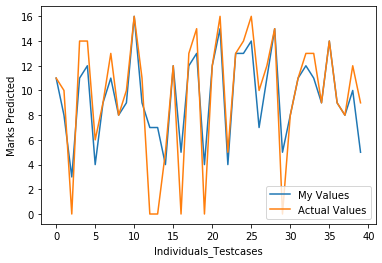

In [22]:
plt.plot(list(range(len(array_pred))), array_pred, label='My Values')
plt.plot(list(range(len(y_test))), y_test, label='Actual Values')
plt.xlabel("Individuals_Testcases")
plt.ylabel("Marks Predicted")
plt.legend()

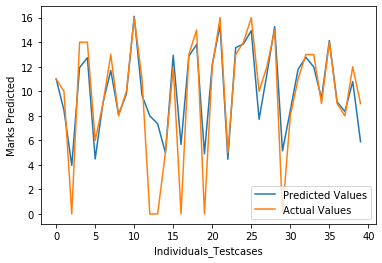

In [23]:
plt.plot(list(range(len(prediction))), prediction, label='Predicted Values')
plt.plot(list(range(len(y_test))), y_test, label='Actual Values')
plt.xlabel("Individuals_Testcases")
plt.ylabel("Marks Predicted")
plt.legend()